In [1]:
import numpy as np
from matplotlib import pylab
from pylab import *

In [2]:
from IPython.display import Image
Image(url='http://www.viralml.com/static/images/reinforcement-learning/looking-for-honey.png')

In [3]:
# map cell to cell, add circular cell to goal point
# points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]
points_list = [(0,2),(0,1),(2,3),(2,4),(2,5),(5,6),(6,7)]

goal = 7


/home/akhil/.virtualenvs/qlearning/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


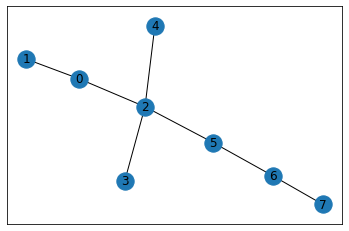

In [4]:

import networkx as nx
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [5]:
# how many points in graph? x points
MATRIX_SIZE = 8

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

In [6]:
# how many points in graph? x points
MATRIX_SIZE = 8

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

In [7]:
# assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0

# add goal point round trip
R[goal,goal]= 100

R


(0, 2)
(0, 1)
(2, 3)
(2, 4)
(2, 5)
(5, 6)
(6, 7)


matrix([[ -1.,   0.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,  -1.,   0.,   0.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1., 100.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,  -1.,   0., 100.]])

In [8]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# learning parameter
gamma = 0.8

initial_state = 1

In [9]:
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

In [10]:
available_act = available_actions(initial_state)
available_act

array([0])

In [11]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)
action

0

In [12]:
def update(current_state, action, gamma):

  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]

  Q[current_state, action] = R[current_state, action] + gamma * max_value
  print('max_value', R[current_state, action] + gamma * max_value)

  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)

update(initial_state, action, gamma)

max_value 0.0


0

In [13]:
# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))

print("Trained Q matrix:")
print(Q/np.max(Q)*100)

max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 100.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 80.0
Score: 180.0
max_value 0.0
Score: 180.0
max_value 0.0
Score: 180.0
max_value 0.0
Score: 180.0
max_value 0.0
Score: 180.0
max_value 0.0
Score: 180.0
max_value 0.0
Score: 180.0
max_value 0.0
Score: 180.0
max_value 80.0
Score: 260.0
max_value 0.0
Score: 260.0
max_value 0.0
Score: 260.0
max_value 80.0
Score: 260.0
max_value 0.0
Score: 260.0
max_value 164.0
Score: 197.5609756097561
max_value 0.0
Score: 197.5609756097561
max_value 0.0
Score: 197.5609756097561
max_value 131.20000000000002
Score: 228.78048780487808
max_value 0.0
Score: 228.78048780487808
max_value 0.0
Score: 228.78048780487808
max_value 131.20000000000002
Score: 260.0
max_value 131.20000000000002
Score: 260.0
max_value 0.0
Score: 260.0
max_value 0.0
Score: 260.0
max_value 204.96000000000004
Score: 308.04059328649487
max_value 0.0
Score:

max_value 338.12562739200007
Score: 862.2241338418531
max_value 216.4004015308801
Score: 864.5664347655988
max_value 338.12562739200007
Score: 864.5664347655988
max_value 165.20040153088007
Score: 864.5664347655988
max_value 165.20040153088007
Score: 864.5664347655988
max_value 216.4004015308801
Score: 864.5664347655988
max_value 165.20040153088007
Score: 873.4964570373796
max_value 165.20040153088007
Score: 873.4964570373796
max_value 216.4004015308801
Score: 873.4964570373796
max_value 216.4004015308801
Score: 873.4964570373796
max_value 216.4004015308801
Score: 873.4964570373796
max_value 422.6570342400001
Score: 873.4964570373796
max_value 216.4004015308801
Score: 873.4964570373796
max_value 216.4004015308801
Score: 875.8387579611253
max_value 216.4004015308801
Score: 875.8387579611253
max_value 270.5005019136001
Score: 875.8387579611253
max_value 173.12032122470407
Score: 877.712598700122
max_value 216.4004015308801
Score: 877.712598700122
max_value 422.6570342400001
Score: 882.28

Score: 851.1948356232745
max_value 235.72500558381068
Score: 851.1948356232745
max_value 150.86400357363885
Score: 853.689600293618
max_value 188.58000446704855
Score: 853.689600293618
max_value 396.59842039280807
Score: 855.0974157916191
max_value 235.72500558381068
Score: 855.0974157916191
max_value 235.72500558381068
Score: 855.0974157916191
max_value 235.72500558381068
Score: 855.0974157916191
max_value 496.59842039280807
Score: 853.804356920747
max_value 396.59842039280807
Score: 853.804356920747
max_value 150.86400357363885
Score: 853.804356920747
max_value 396.59842039280807
Score: 853.804356920747
max_value 235.72500558381068
Score: 853.804356920747
max_value 188.58000446704855
Score: 853.804356920747
max_value 188.58000446704855
Score: 853.804356920747
max_value 235.72500558381068
Score: 853.804356920747
max_value 317.2787363142465
Score: 854.9286806797112
max_value 497.2787363142465
Score: 853.8958796296932
max_value 235.72500558381068
Score: 853.8958796296932
max_value 235.7

max_value 399.85039694676357
Score: 885.5738312316209
max_value 253.8229890513972
Score: 885.5738312316209
max_value 399.85039694676357
Score: 885.5738312316209
max_value 253.8229890513972
Score: 885.5738312316209
max_value 203.05839124111776
Score: 885.5738312316209
max_value 203.05839124111776
Score: 885.5738312316209
max_value 253.8229890513972
Score: 885.5738312316209
max_value 253.8229890513972
Score: 885.5738312316209
max_value 319.81299618345446
Score: 885.5831849207993
max_value 253.8229890513972
Score: 885.5831849207993
max_value 203.05839124111776
Score: 885.5831849207993
max_value 319.81299618345446
Score: 885.5831849207993
max_value 253.8229890513972
Score: 885.5831849207993
max_value 253.8229890513972
Score: 885.5831849207993
max_value 203.05839124111776
Score: 885.5831849207993
max_value 253.8229890513972
Score: 885.5831849207993
max_value 319.81299618345446
Score: 885.5831849207993
max_value 499.81299618345446
Score: 885.5925386099777
max_value 203.05839124111776
Score: 

Most efficient path:
[0, 2, 5, 6, 7]
scores>>>>>>>>>> [0, 0, 0, 100.0, 100.0, 100.0, 100.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 260.0, 260.0, 260.0, 260.0, 260.0, 197.5609756097561, 197.5609756097561, 197.5609756097561, 228.78048780487808, 228.78048780487808, 228.78048780487808, 260.0, 260.0, 260.0, 260.0, 308.04059328649487, 308.04059328649487, 308.04059328649487, 308.04059328649487, 308.04059328649487, 308.04059328649487, 308.04059328649487, 308.04059328649487, 308.04059328649487, 308.04059328649487, 308.04059328649487, 308.04059328649487, 359.2505854800936, 359.2505854800936, 359.2505854800936, 359.2505854800936, 359.2505854800936, 359.2505854800936, 359.2505854800936, 359.2505854800936, 359.2505854800936, 301.29712692447566, 301.29712692447566, 301.29712692447566, 301.29712692447566, 301.29712692447566, 302.88558441825546, 302.88558441825546, 302.88558441825546, 302.88558441825546, 302.88558441825546, 340.72273297546326, 340.72273297546326, 340.72273297546326, 3

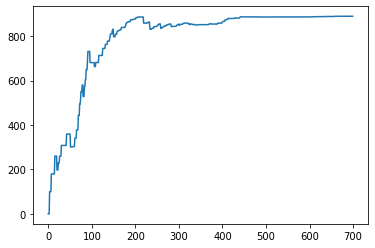

In [16]:
# Testing
current_state = 0
steps = [current_state]

while current_state != 7:
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

print("scores>>>>>>>>>>", scores)

plt.plot(scores)
plt.show()

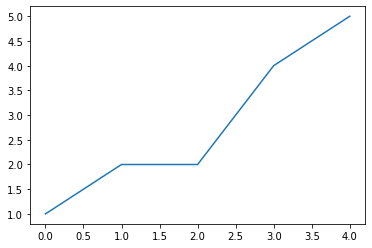

In [18]:
plt.plot([1,2,2,4,5])
plt.show()